### Chapter 9 - Parametric Inference Exercise 9
Let $X_1,...,X_n \sim N(\mu, 1)$. Let $\theta = e^{\mu}$ and let $\hat \theta = e^{\bar X}$ be the MLE. Create a data set (using $\mu = 5$) consisting of $n=100$ observations.

#### (a) Use the delta method to get $\hat se$ and a 95 percent confidence interval for $\theta$. Use the parametric bootstrap to get $\hat se$ and 95 percent confidence interval for $\theta$. Use the nonparametric bootstrap to get $\hat se$ and 95 percent confidence interval for $\theta$. Compare your answers.

$\theta$ is a function of $\mu$, $g(\mu)$. By delta method, it can be shown that

$$ \hat \theta \sim N(\theta, se(\hat \theta)^2 )$$

where

$se(\hat \theta) = |g'(\mu)|se(\hat \mu) = e^{\mu}/\sqrt{n}$

$ se(\hat \mu) = 1/\sqrt{n}$

$\hat \mu$ is the MLE of $\mu, \hat \mu = \sum_{i=1}^{n} X_i/n$

In [50]:
mu <- 5
n <- 100
x <- rnorm(n, mean = mu, sd = 1)

In [56]:
# MLE se and confidence interval
mle.mu <- mean(x)
mle.theta <- exp(mle.mu)
mle.se <- exp(mle.mu) / sqrt(n)
mle.low <- mle.theta - qnorm(0.975)*mle.se
mle.high <- mle.theta + qnorm(0.975)*mle.se

In [57]:
# Parametric bootstrap se and (pivotal) confidence interval
B <- 10000
para.retheta <- numeric(B)
for (i in 1:B) {
    re.x <- rnorm(n, mean = mle.mu, sd =1)
    para.retheta[i] <- exp(mean(re.x))
}
para.se <- sqrt(var(para.retheta))
para.lowq <- quantile(para.retheta, probs = 0.025)
para.highq <- quantile(para.retheta, probs = 0.975)
para.low <- 2*mle.theta - para.highq
para.high <- 2*mle.theta - para.lowq

In [58]:
# Nonparametric bootstrap se and (pivotal) confidence interval
nonpara.retheta <- numeric(B)
for (i in 1:B) {
    re.x <- sample(x, size = n, replace = TRUE)
    nonpara.retheta[i] <- exp(mean(re.x))
}
nonpara.se <- sqrt(var(nonpara.retheta))
nonpara.lowq <- as.numeric(quantile(nonpara.retheta, probs = 0.025))
nonpara.highq <- as.numeric(quantile(nonpara.retheta, probs = 0.975))
nonpara.low <- 2*mle.theta - nonpara.highq
nonpara.high <- 2*mle.theta - nonpara.lowq

In [59]:
# Comparison
print(paste0("Delta Method standard error = ", round(mle.se, 3)))
print(paste0("Parametric Bootstrap standard error = ", round(para.se, 3)))
print(paste0("Nonparametric Bootstrap standard error = ", round(nonpara.se, 3)))

[1] "Delta Method standard error = 13.732"
[1] "Parametric Bootstrap standard error = 13.938"
[1] "Nonparametric Bootstrap standard error = 12.7"


In [60]:
# Comparison
print(paste0("Delta Method confidence interval = (", round(mle.low, 3), ", ",round(mle.high, 3),")"))
print(paste0("Parametric Bootstrap confidence interval = (", round(para.low, 3), ", ",round(para.high, 3),")"))
print(paste0("Nonparametric Bootstrap confidence interval = (", round(nonpara.low, 3), ", ",round(nonpara.high, 3),")"))

[1] "Delta Method confidence interval = (110.408, 164.237)"
[1] "Parametric Bootstrap confidence interval = (107.604, 161.943)"
[1] "Nonparametric Bootstrap confidence interval = (110.586, 160.283)"


* Parametric bootstrap is pretty close to the one estimated by delta method
* Nonparametric bootstrap yields a narrower intervals, hence it is more informative

#### (b) Plot a histogram of the bootstrap replications for the parametric and nonparametric bootstrap. These are estiates of the distribution of $\hat \theta$. The delta method also gives an approximation to this distribution namely, $N(\hat \theta, \hat se^2)$. Compare these to the true sampling distribution of $\hat \theta$ (which you can get by simulation). Which approximation - parametric bootstrap, bootstrap, or delta method - is closer to the true distribution?

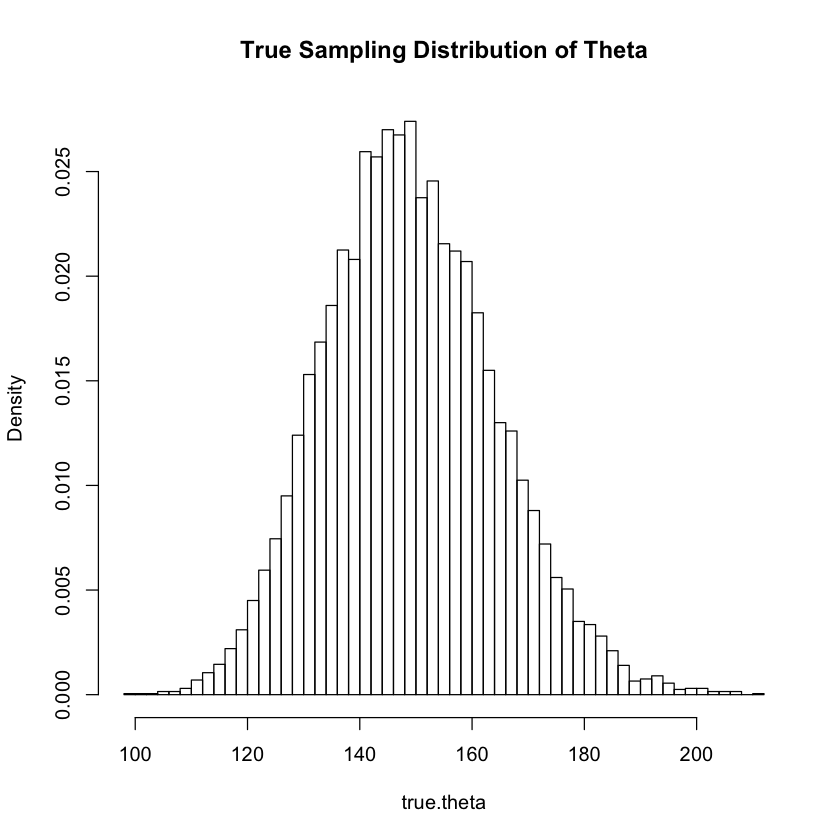

In [62]:
true.theta <- numeric(B)
for (i in 1:B) {
    re.x <- rnorm(n, mean = mu, 1)
    true.theta[i] <- exp(mean(re.x))
}
hist(true.theta, main = "True Sampling Distribution of Theta", breaks = 50, freq = FALSE)

In [63]:
mle.retheta <- rnorm(B, mean = mle.theta, sd = mle.se)

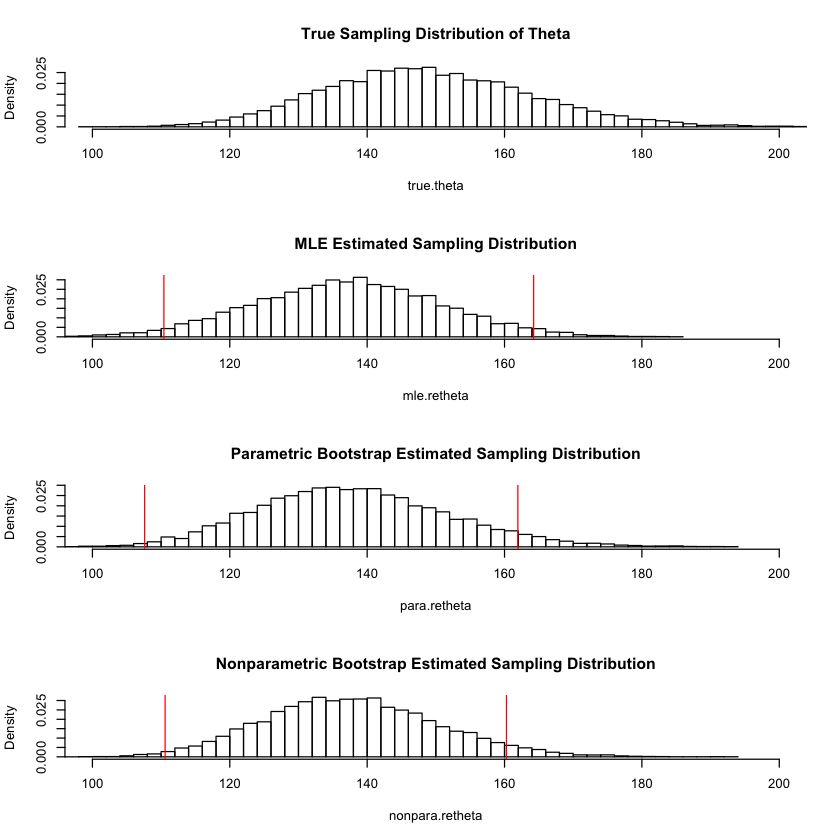

In [68]:
par(mfrow=c(4,1))
hist(true.theta, main = "True Sampling Distribution of Theta", breaks = 50, freq = FALSE, xlim = c(100, 200))
hist(mle.retheta, main = "MLE Estimated Sampling Distribution", breaks = 70, freq = FALSE, xlim = c(100, 200))
abline(v = c(mle.low, mle.high), col = "red")
hist(para.retheta, main = "Parametric Bootstrap Estimated Sampling Distribution", breaks = 50, freq = FALSE, xlim = c(100, 200))
abline(v = c(para.low, para.high), col = "red")
hist(nonpara.retheta, main = "Nonparametric Bootstrap Estimated Sampling Distribution", breaks = 50, freq = FALSE, xlim = c(100, 200))
abline(v = c(nonpara.low, nonpara.high), col = "red")

* All three estimations are fairly similar
* The true sampling distribution of $\theta$ has a slight positive skewness, both parametric and nonparametric bootstrap estimation can capture such skewness
* In terms of confidence interval, all of them are not desirable in capturing the true interval. All confidence intervals should have been shifted rightwards.

#### Remarks
Note that $\theta$ is in fact a log-normal random variable. This example sheds some lights on the characteristics of log-normal distribution. The variance of the normal distribution controls the shape of its log-normal distribution. As the variance goes down, the log-normal distribution more resembles a normal distribution and its left tail asymptotically vanishes. **It echoes with the asymptotical normality of transformed MLE estimator. With more sample data, the variance of the MLE estimator goes down, so as its transformed MLE estimator. Even though the sampling distribution of the transformed MLE estimator is log-normal, it doesn't matter - with decreasing variance, the log-normal distribution is closed to a normal distribution.**